## CheckPoint 01 (2° Semester) - Dynamic Programming

- Fabrício Saavedra - RM:97631
- Guilherme Akio - RM:98582
- Matheus Motta - RM:550352

### In this notebook there is a study on the performance of 4 different algorithms for matrix multiplication

##### Importing the libraries

In [1]:
import numpy as np  # Library for numerical operations, used to generate matrices
import time  # Library to measure execution time
import matplotlib.pyplot as plt  # Library for visualization of graphs

##### First - Traditional way

In [2]:
# Traditional Matrix Multiplication Algorithm
def multiply_traditional(A, B):
    n = len(A) # Get the size of the matrix (assuming square matrices)
    result = [[0] * n for _ in range(n)] # Initialize the result matrix with zeros
    # Loop to calculate the product of two matrices
    for i in range(n): # Iterate over the rows of A
        for j in range(n): # Iterate over the columns of B
            for k in range(n): # Iterate to calculate the scalar product
                result[i][j] += A[i][k] * B[k][j] # Sum the product of the elements
    return result

##### Second - Strassen Algorithm

In [3]:
# Helper functions for Strassen's Algorithm
def add_matrices(A, B):
    # Adds two matrices
    return [[A[i][j] + B[i][j] for j in range(len(A))] for i in range(len(A))]

def subtract_matrices(A, B):
    # Subtracts two matrices
    return [[A[i][j] - B[i][j] for j in range(len(A))] for i in range(len(A))]

# Strassen's Algorithm for matrix multiplication
def multiply_strassen(A, B):
    # Base case: if the matrix is 1x1
    if len(A) == 1:
        return [[A[0][0] * B[0][0]]]
    
    # Dividing the matrices into 4 submatrices
    mid = len(A) // 2 # Define the midpoint for division
    A11, A12, A21, A22 = split_matrix(A, mid) # Divide matrix A
    B11, B12, B21, B22 = split_matrix(B, mid) # Divide matrix B

    # Calculating Strassen's products
    M1 = multiply_strassen(add_matrices(A11, A22), add_matrices(B11, B22))
    M2 = multiply_strassen(add_matrices(A21, A22), B11)
    M3 = multiply_strassen(A11, subtract_matrices(B12, B22))
    M4 = multiply_strassen(A22, subtract_matrices(B21, B11))
    M5 = multiply_strassen(add_matrices(A11, A12), B22)
    M6 = multiply_strassen(subtract_matrices(A21, A11), add_matrices(B11, B12))
    M7 = multiply_strassen(subtract_matrices(A12, A22), add_matrices(B21, B22))

    # Calculating the quadrants of the result
    C11 = add_matrices(subtract_matrices(add_matrices(M1, M4), M5), M7)
    C12 = add_matrices(M3, M5)
    C21 = add_matrices(M2, M4)
    C22 = add_matrices(subtract_matrices(add_matrices(M1, M3), M2), M6)

    # Combining the submatrices
    return combine_matrices(C11, C12, C21, C22)

# Function to split the matrix into 4 submatrices
def split_matrix(matrix, mid):
    A11 = [row[:mid] for row in matrix[:mid]]
    A12 = [row[mid:] for row in matrix[:mid]]
    A21 = [row[:mid] for row in matrix[mid:]]
    A22 = [row[mid:] for row in matrix[mid:]]
    return A11, A12, A21, A22

# Function to combine 4 submatrices into a larger matrix
def combine_matrices(C11, C12, C21, C22):
    n = len(C11)
    new_matrix = [[0] * (2 * n) for _ in range(2 * n)] # Initialize the combined matrix
    for i in range(n):
        for j in range(n):
            # Copy the elements to the new matrix
            new_matrix[i][j] = C11[i][j]
            new_matrix[i][j + n] = C12[i][j]
            new_matrix[i + n][j] = C21[i][j]
            new_matrix[i + n][j + n] = C22[i][j]
    return new_matrix

##### Third - Winograd Algorithm

In [4]:
# Winograd's Algorithm for matrix multiplication
def multiply_winograd(A, B):
    n = len(A) # Matrix size
    result = [[0] * n for _ in range(n)] # Initialize the result matrix with zeros

    # Intermediate products to optimize calculations
    row_factor = [sum(A[i][k] * A[i][k+1] for k in range(0, n-1, 2)) for i in range(n)]
    col_factor = [sum(B[k][j] * B[k+1][j] for k in range(0, n-1, 2)) for j in range(n)]

    # Main multiplication using precomputed factors
    for i in range(n):
        for j in range(n):
            result[i][j] = -row_factor[i] - col_factor[j]
            for k in range(0, n-1, 2):
                result[i][j] += (A[i][k] + B[k+1][j]) * (A[i][k+1] + B[k][j])
    
    # Correction if n is odd (when there is an additional column/row)
    if n % 2:
        for i in range(n):
            for j in range(n):
                result[i][j] += A[i][n-1] * B[n-1][j]

    return result

##### Fourth - Karstadt

In [5]:
# Karstadt's Algorithm for matrix multiplication
def multiply_karstadt(A, B):
    n = len(A) # Matrix size
    result = [[0] * n for _ in range(n)] # Initialize the result matrix with zeros

    # Preparation for Karstadt's algorithm
    # Dividing matrices into smaller blocks
    block_size = 2  # Example of block size 2x2
    for i in range(0, n, block_size):
        for j in range(0, n, block_size):
            for k in range(0, n, block_size):
                # Multiplication of smaller blocks
                for ii in range(block_size):
                    for jj in range(block_size):
                        for kk in range(block_size):
                            result[i+ii][j+jj] += A[i+ii][k+kk] * B[k+kk][j+jj]
    return result

##### Functions to calculate the results

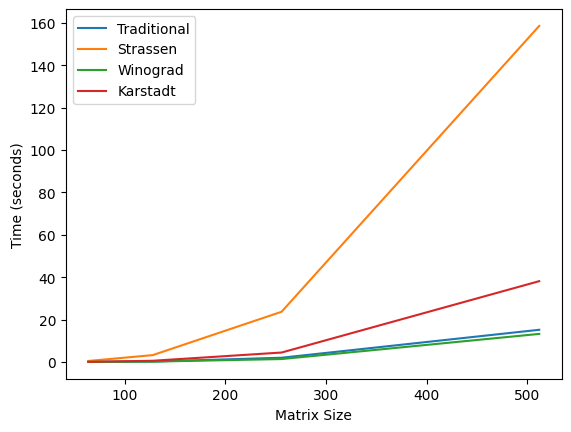

In [6]:
# Function to measure the execution time of each algorithm
def measure_time(func, A, B):
    start_time = time.time() # Mark the start time
    func(A, B) # Execute the matrix multiplication function
    end_time = time.time() # Mark the end time
    return end_time - start_time # Return the execution time

# Function to test the performance of the algorithms
def test_performance(w, x, y, z):
    sizes = [w, x, y, z] # Matrix sizes for performance testing
    traditional_times = [] # List to store the times of the Traditional algorithm
    strassen_times = [] # List to store the times of Strassen's algorithm
    winograd_times = [] # List to store the times of Winograd's algorithm
    karstadt_times = [] # List to store the times of Karstadt's algorithm

    # Test each matrix size
    for size in sizes:
        A = np.random.randint(10, size=(size, size)).tolist() # Generate a random matrix A
        B = np.random.randint(10, size=(size, size)).tolist() # Generate a random matrix B

        # Measure and store the execution time of each algorithm
        traditional_times.append(measure_time(multiply_traditional, A, B))
        strassen_times.append(measure_time(multiply_strassen, A, B))
        winograd_times.append(measure_time(multiply_winograd, A, B))
        karstadt_times.append(measure_time(multiply_karstadt, A, B))

    # Visualize the results
    plt.plot(sizes, traditional_times, label='Traditional')
    plt.plot(sizes, strassen_times, label='Strassen')
    plt.plot(sizes, winograd_times, label='Winograd')
    plt.plot(sizes, karstadt_times, label='Karstadt')
    plt.xlabel('Matrix Size') # X-axis label
    plt.ylabel('Time (seconds)') # Y-axis label
    plt.legend() # Legend to differentiate the algorithms
    plt.show() # Show the plot

# Execute the performance test
test_performance(64, 128, 256, 512)